In [2]:
# import lib
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(5678)

[0.26456039 0.89367243 0.55275402 0.4121718  0.28307214 0.742975
 0.92637458 0.84958204 0.50339065 0.10423391]


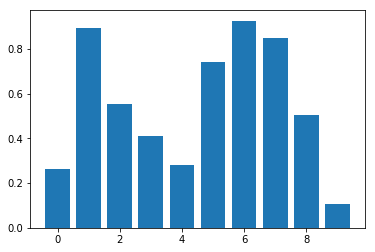

In [9]:
# declare some 
expected_action_value =  np.random.uniform(0 ,1 , 10)
print(expected_action_value)
plt.bar(range(10),expected_action_value)
plt.show()

In [30]:
# basic
estimated_action_value = np.zeros(10)


def reward_function1(action_taken, expected_action_value):
    if np.random.uniform(0, 1) <= expected_action_value[action_taken]: return 1
    return 0

def reward_function(action_taken, expected_action_value):
    if np.random.uniform(0, 1) <= expected_action_value[action_taken]: return 1
    return -1

def multi_arm_bandit_problem(arms = 10, steps = 1000, e = 0.1, expected_action_value = []):
    overall_reward, optimal_action = [], []
    estimate_action_value = np.zeros(arms)
    count = np.zeros(arms)
    for s in range(0, steps):
        e_estimator = np.random.uniform(0, 1)
        action = np.argmax(estimate_action_value) if e_estimator > e else np.random.choice(np.arange(10))
        reward = reward_function(action, expected_action_value)
        estimate_action_value[action] = estimate_action_value[action] + (1/(count[action]+1)) * (reward - estimate_action_value[action])
        overall_reward.append(reward)
        optimal_action.append(action == np.argmax(expected_action_value))
        count[action] += 1
    return(overall_reward, optimal_action)

def run_game(runs = 2000, steps = 1000, arms = 10):
    rewards = np.zeros((runs, steps))
    optimal_actions = np.zeros((runs, steps))
    expected_action_value = np.random.uniform(0, 1 , arms)
    for run in range(0, runs):
        rewards[run][:], optimal_actions[run][:] = multi_arm_bandit_problem(arms = arms, steps = steps, e = epsilon_values[e_step], expected_action_value = expected_action_value)
    rewards_avg = np.average(rewards, axis = 1)
    optimal_action_perc = np.average(optimal_actions, axis = 1)
    return (rewards_avg, optimal_action_perc)

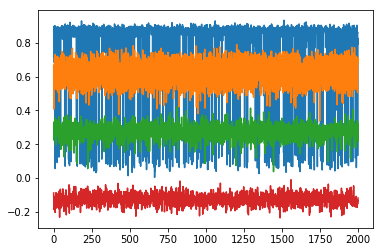

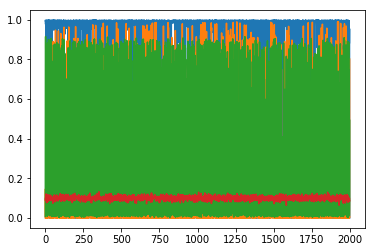

In [31]:
epsilon_values  = [0,0.01,0.1,1.0]
all_rewards_avg = []
all_optimal_action_perc = []

e_step = 0
rewards_avg1, optimal_action_perc1 = run_game()
e_step = 1
rewards_avg2, optimal_action_perc2 = run_game()
e_step = 2
rewards_avg3, optimal_action_perc3 = run_game()
e_step = 3
rewards_avg4, optimal_action_perc4 = run_game()

plt.plot(rewards_avg1)
plt.plot(rewards_avg2)
plt.plot(rewards_avg3)
plt.plot(rewards_avg4)
plt.show()

plt.plot(optimal_action_perc1)
plt.plot(optimal_action_perc2)
plt.plot(optimal_action_perc3)
plt.plot(optimal_action_perc4)
plt.show()

# Reference
1. Reinforcement Learning with Multi Arm Bandit – ITNEXT. (2018). ITNEXT. Retrieved 24 December 2018, from https://itnext.io/reinforcement-learning-with-multi-arm-bandit-decf442e02d2
2. matplotlib.pyplot.bar — Matplotlib 3.0.2 documentation. (2018). Matplotlib.org. Retrieved 24 December 2018, from https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html
3. 